## Import all libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random

In [12]:
#read in the data

chicago_data = pd.read_csv("chicago_2017.csv")
chicago_weather = pd.read_csv("weather_hourly_chicago.csv")

### Some Information about the data set

In [33]:
chicago_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3829014 entries, 431690 to 3159775
Data columns (total 12 columns):
 #   Column              Dtype          
---  ------              -----          
 0   start_time          datetime64[ns] 
 1   end_time            datetime64[ns] 
 2   start_station_id    int64          
 3   end_station_id      int64          
 4   start_station_name  object         
 5   end_station_name    object         
 6   bike_id             int64          
 7   user_type           object         
 8   travel_delta        timedelta64[ns]
 9   Weekday             int64          
 10  Hour                int64          
 11  Date                object         
dtypes: datetime64[ns](2), int64(5), object(4), timedelta64[ns](1)
memory usage: 379.8+ MB


In [15]:
chicago_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43788 non-null  object 
 1   max_temp   43788 non-null  float64
 2   min_temp   43788 non-null  float64
 3   precip     43790 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


In [56]:
chicago_data.describe()

,start_station_id,end_station_id,bike_id,travel_delta,Weekday,Hour
count,3.829007e+06,3.829007e+06,3.829007e+06,3829007,3.829007e+06,3.829007e+06
mean,1.803509e+02,1.805160e+02,3.425114e+03,0 days 00:15:55.629929900,2.910294e+00,1.376029e+01
std,1.328194e+02,1.329273e+02,1.861236e+03,0 days 00:26:09.593904120,1.989135e+00,4.641902e+00
min,2.000000e+00,2.000000e+00,1.000000e+00,-1 days +23:08:00,0.000000e+00,0.000000e+00
25%,7.400000e+01,7.400000e+01,1.803000e+03,0 days 00:06:46,1.000000e+00,1.000000e+01
50%,1.560000e+02,1.560000e+02,3.583000e+03,0 days 00:11:25,3.000000e+00,1.500000e+01
75%,2.680000e+02,2.680000e+02,5.063000e+03,0 days 00:19:06,5.000000e+00,1.700000e+01
max,6.260000e+02,6.260000e+02,6.471000e+03,0 days 23:58:58,6.000000e+00,2.300000e+01


In [55]:
chicago_data.head(10)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,travel_delta,Weekday,Hour,Date
431690,2017-01-01 00:00:36,2017-01-01 00:06:32,414,191,Canal St & Taylor St,Canal St & Monroe St (*),2511,Customer,0 days 00:05:56,6,0,2017-01-01
431689,2017-01-01 00:02:54,2017-01-01 00:08:21,28,20,Larrabee St & Menomonee St,Sheffield Ave & Kingsbury St,3660,Subscriber,0 days 00:05:27,6,0,2017-01-01
431688,2017-01-01 00:06:06,2017-01-01 00:18:31,620,333,Orleans St & Chestnut St (NEXT Apts),Ashland Ave & Blackhawk St,4992,Subscriber,0 days 00:12:25,6,0,2017-01-01
431687,2017-01-01 00:07:28,2017-01-01 00:12:51,287,68,Franklin St & Monroe St,Clinton St & Tilden St,5637,Subscriber,0 days 00:05:23,6,0,2017-01-01
431686,2017-01-01 00:07:57,2017-01-01 00:20:53,300,118,Broadway & Barry Ave,Sedgwick St & North Ave,2209,Subscriber,0 days 00:12:56,6,0,2017-01-01
431685,2017-01-01 00:10:44,2017-01-01 00:21:27,47,175,State St & Kinzie St,Wells St & Polk St,670,Subscriber,0 days 00:10:43,6,0,2017-01-01
431684,2017-01-01 00:11:34,2017-01-01 00:23:47,194,68,Wabash Ave & Wacker Pl,Clinton St & Tilden St,1145,Subscriber,0 days 00:12:13,6,0,2017-01-01
431683,2017-01-01 00:14:57,2017-01-01 00:26:22,81,191,Daley Center Plaza,Canal St & Monroe St (*),4282,Customer,0 days 00:11:25,6,0,2017-01-01
431682,2017-01-01 00:15:03,2017-01-01 00:26:28,81,191,Daley Center Plaza,Canal St & Monroe St (*),2220,Customer,0 days 00:11:25,6,0,2017-01-01
431681,2017-01-01 00:17:01,2017-01-01 00:29:49,60,54,Dayton St & North Ave,Ogden Ave & Chicago Ave,5258,Customer,0 days 00:12:48,6,0,2017-01-01


**No missing data** --> all parametes have 3 829 014 values

### Add new columns to the Dataframe

In [18]:
chicago_data['start_time']= pd.to_datetime(chicago_data['start_time'])

In [19]:
chicago_data['end_time'] = pd.to_datetime(chicago_data['end_time'])

In [20]:
chicago_data['travel_delta'] = (chicago_data['end_time']-chicago_data['start_time'])

In [21]:
chicago_data.sort_values(['start_time'], inplace = True)

In [45]:
chicago_data["Weekday"] = chicago_data['start_time'].dt.weekday

In [53]:
chicago_data["Hour"] = chicago_data['start_time'].dt.hour

In [54]:
chicago_data["Date"] = chicago_data['start_time'].dt.date

In [22]:
number_bikes = len(chicago_data['bike_id'].unique())
print("The overall number of bikes is {}".format(number_bikes))

The overall number of bikes is 6243


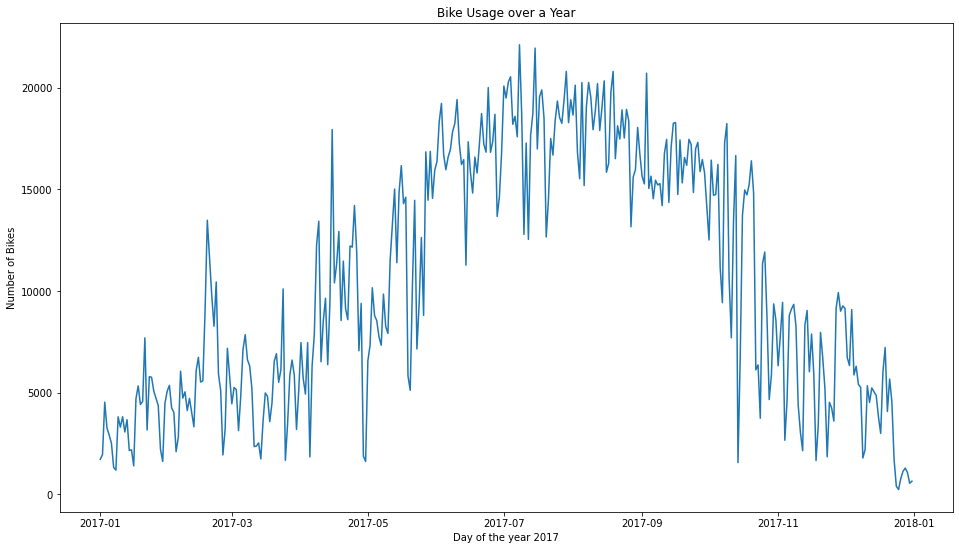

In [201]:
chicago_data_Date_avail = chicago_data.groupby("Date")['bike_id'].count()
chicago_data_Date_avail = pd.DataFrame(chicago_data_Date_avail)

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_avail)

ax.set_title('Bike Usage over a Year')
ax.set_ylabel("Number of Bikes")
ax.set_xlabel("Day of the year 2017")
plt.show()

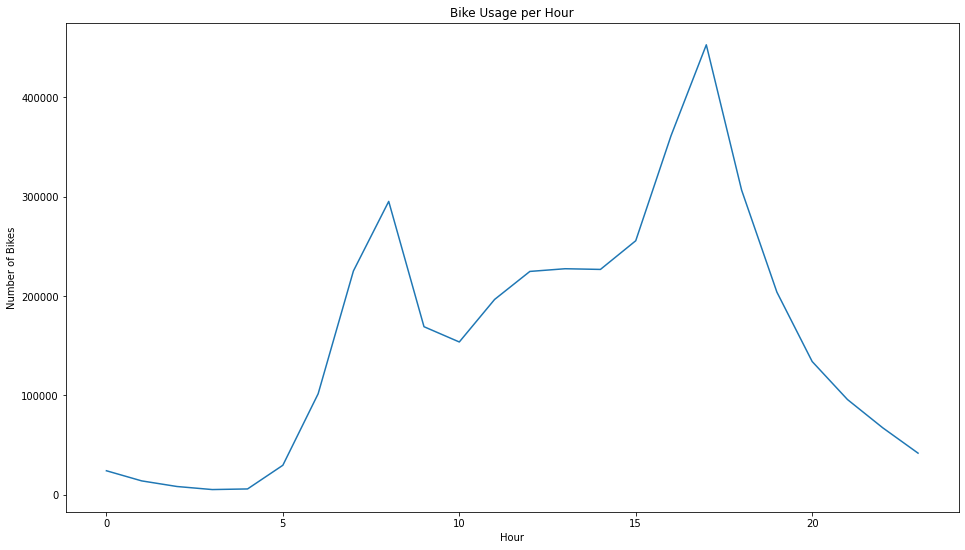

In [204]:
chicago_data_Hour_avail = chicago_data.groupby("Hour")['bike_id'].count()
chicago_data_Hour_avail =pd.DataFrame(chicago_data_Hour_avail)

fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Day_avail)

ax.set_title('Bike Usage per Hour')
ax.set_ylabel("Number of Bikes")
ax.set_xlabel("Hour")
plt.show()

### Hier vielleicht nochmal dasselbe mit einem Wochenschnitt (damit weniger Varianz in den Daten ist)

In [203]:
chicago_data_Hour_avail = chicago_data.groupby(['Date','Hour'])['bike_id'].count()
chicago_data_Hour_avail = pd.DataFrame(chicago_data_Hour_avail)

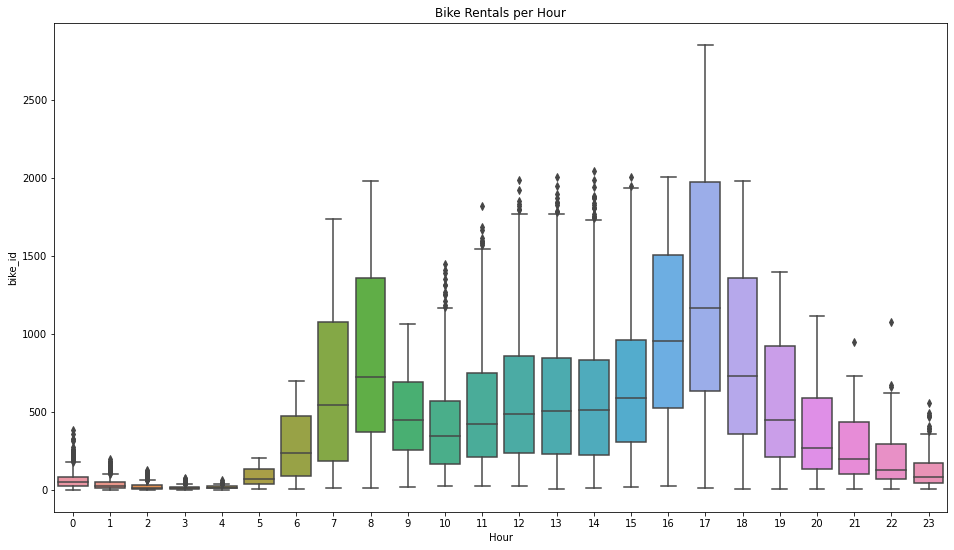

In [86]:
fig, ax = plt.subplots(figsize = (16,9))

sns.boxplot(x = chicago_data_Hour_avail.index.get_level_values('Hour'), y =chicago_data_Hour_avail['bike_id'], ax = ax)

ax.set_title('Bike Rentals per Hour')
plt.show()

In [78]:
chicago_data_Weekday_avail = chicago_data.groupby(['Date', 'Weekday'])['bike_id'].count()
chicago_data_Weekday_avail = pd.DataFrame(chicago_data_Weekday_avail)
#chicago_data_Hour_avail.head(24)

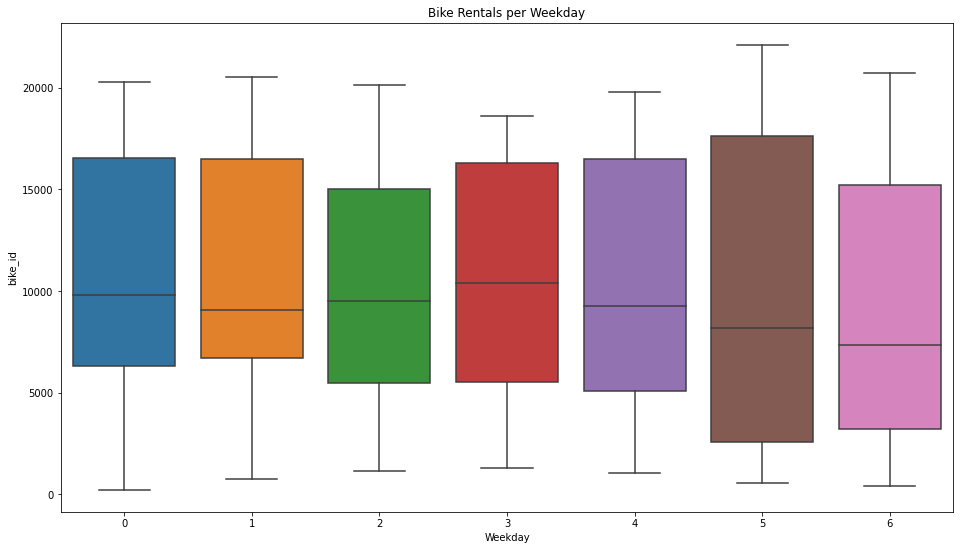

In [79]:

fig, ax = plt.subplots(figsize = (16,9))

sns.boxplot(x = chicago_data_Weekday_avail.index.get_level_values('Weekday'), y =chicago_data_Weekday_avail['bike_id'], ax = ax)

ax.set_title('Bike Rentals per Weekday')
plt.show()

Ideen
- als weitere Dimension noch die Länge der Reise (am Wochende eher länger oder kürzere Touren)
- 

# Weather

In [107]:
chicago_weather.head()

,date_time,max_temp,min_temp,precip,Date
6,2015-01-01 07:00:00,-8.3,-8.3,0.0,2015-01-01 07:00:00
7,2015-01-01 08:00:00,-8.9,-8.9,0.0,2015-01-01 08:00:00
8,2015-01-01 09:00:00,-8.9,-8.9,0.0,2015-01-01 09:00:00
9,2015-01-01 10:00:00,-9.4,-9.4,0.0,2015-01-01 10:00:00
10,2015-01-01 11:00:00,-10.0,-10.0,0.0,2015-01-01 11:00:00


In [134]:
chicago_weather['date_time']=pd.to_datetime(chicago_weather['date_time'])

In [130]:
first_date = datetime(year=2017, day=1, month=1)
last_date = datetime(year=2017, day=31, month=12)
chicago_weather_2017 = chicago_weather[(chicago_weather['date_time']>=first_date)&(chicago_weather["date_time"] <= last_date)]

In [180]:
chicago_weather_2017.sort_values(by = "date_time", inplace = True)

<ipython-input-180-0c61a4185a2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017.sort_values(by = "date_time", inplace = True)


In [159]:
chicago_weather_2017['Date']= chicago_weather_2017["date_time"].dt.date

<ipython-input-159-dc2a551882f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Date']= chicago_weather_2017["date_time"].dt.date


In [139]:
chicago_weather_2017['Weekday']= chicago_weather_2017["date_time"].dt.weekday

<ipython-input-139-bfecda6ec4f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Weekday']= chicago_weather_2017["date_time"].dt.weekday


In [137]:
chicago_weather_2017['Hour']= chicago_weather_2017["date_time"].dt.hour

<ipython-input-137-f26ad119289e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Hour']= chicago_weather_2017["date_time"].dt.hour


In [178]:
chicago_weather_2017['Month']= chicago_weather_2017["date_time"].dt.month

<ipython-input-178-c9653efbc821>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017['Month']= chicago_weather_2017["date_time"].dt.month


In [150]:
chicago_weather_2017["mean_temp"] = (chicago_weather_2017['max_temp']+chicago_weather_2017['min_temp'])/2

<ipython-input-150-c1a66da8a464>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_weather_2017["mean_temp"] = (chicago_weather_2017['max_temp']+chicago_weather_2017['min_temp'])/2


In [179]:
chicago_weather_2017.head()

,date_time,max_temp,min_temp,precip,Date,Hour,Weekday,mean_temp,Month
17543,2017-01-01 00:00:00,-0.6,-0.6,0.0,2017-01-01,0,6,-0.6,1
17520,2017-01-01 01:00:00,-2.2,-2.2,0.0,2017-01-01,1,6,-2.2,1
17521,2017-01-01 02:00:00,-2.8,-2.8,0.0,2017-01-01,2,6,-2.8,1
17522,2017-01-01 03:00:00,-3.3,-3.3,0.0,2017-01-01,3,6,-3.3,1
17523,2017-01-01 04:00:00,-3.3,-3.3,0.0,2017-01-01,4,6,-3.3,1


In [111]:
chicago_weather_2017[chicago_weather_2017["precip"]>0].count()

date_time    776
max_temp     776
min_temp     776
precip       776
Date         776
dtype: int64

## Weather Hourly

In [173]:
chicago_weather_2017_temp_hourly_min = chicago_weather_2017.groupby("date_time")["min_temp"].mean()
chicago_weather_2017_temp_hourly_max = chicago_weather_2017.groupby("date_time")["max_temp"].mean()
chicago_weather_2017_temp_hourly_mean = chicago_weather_2017.groupby("date_time")["mean_temp"].mean()
chicago_weather_2017_precip_hourly = chicago_weather_2017.groupby("date_time")["precip"].mean()

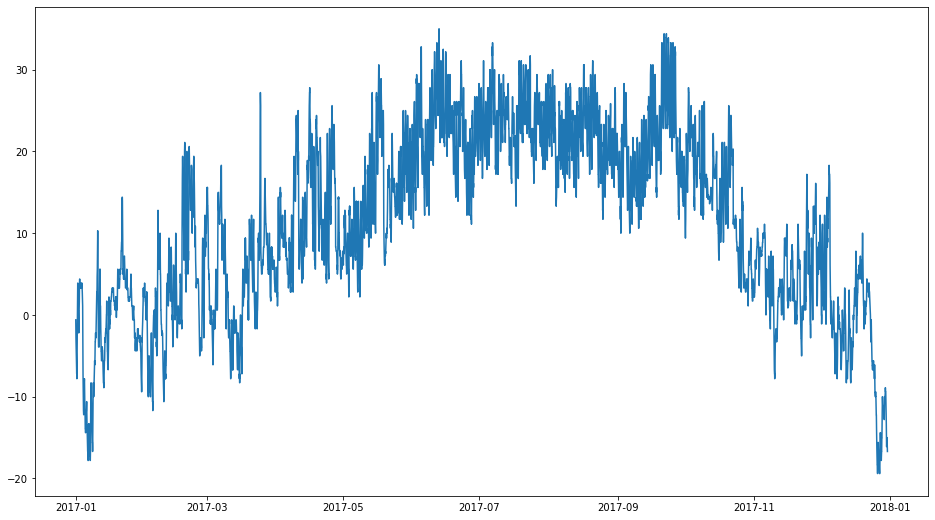

In [158]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_temp_hourly_mean)
plt.show()

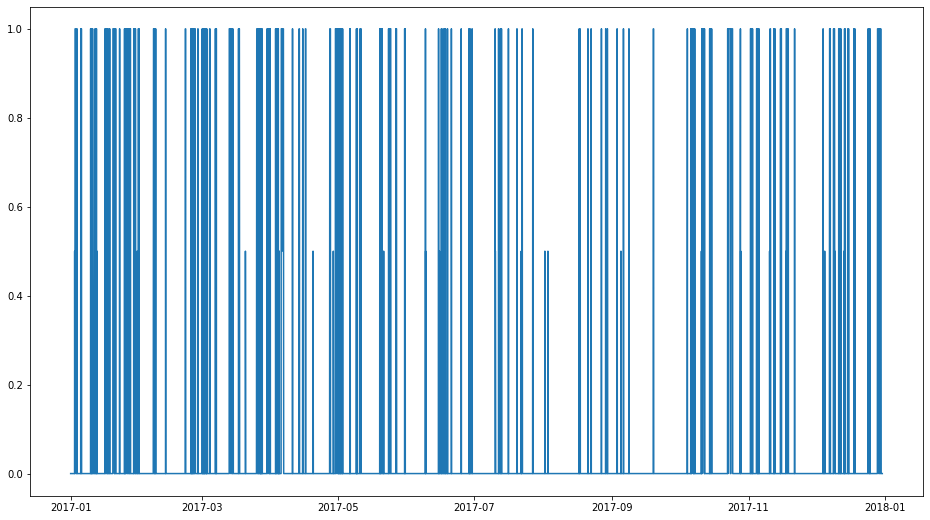

In [176]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_precip_hourly)
plt.show()

## Weather Daily

In [171]:
chicago_weather_2017_temp_daily_min = chicago_weather_2017.groupby("Date")["min_temp"].mean()
chicago_weather_2017_temp_daily_max = chicago_weather_2017.groupby("Date")["max_temp"].mean()
chicago_weather_2017_temp_daily_mean = chicago_weather_2017.groupby("Date")["mean_temp"].mean()
chicago_weather_2017_precip_daily = chicago_weather_2017.groupby("Date")["precip"].mean()

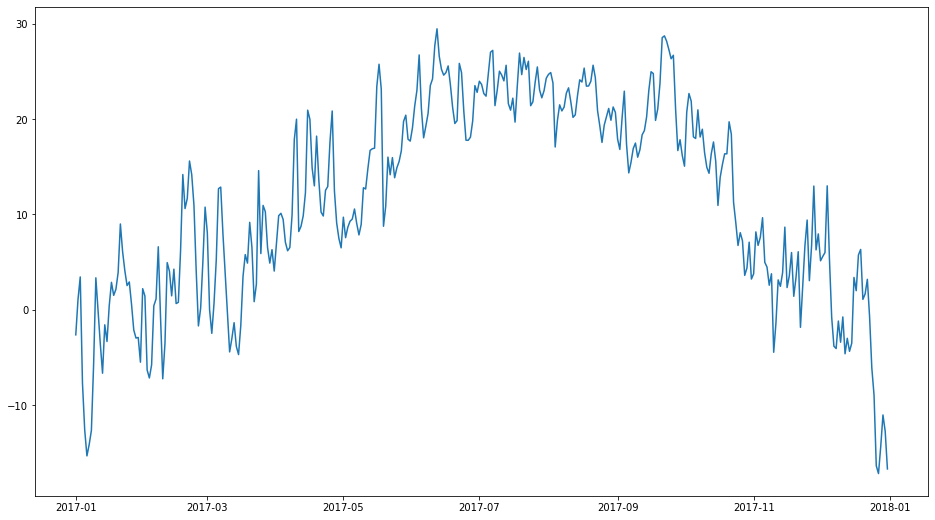

In [166]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_temp_daily_mean)

plt.show()

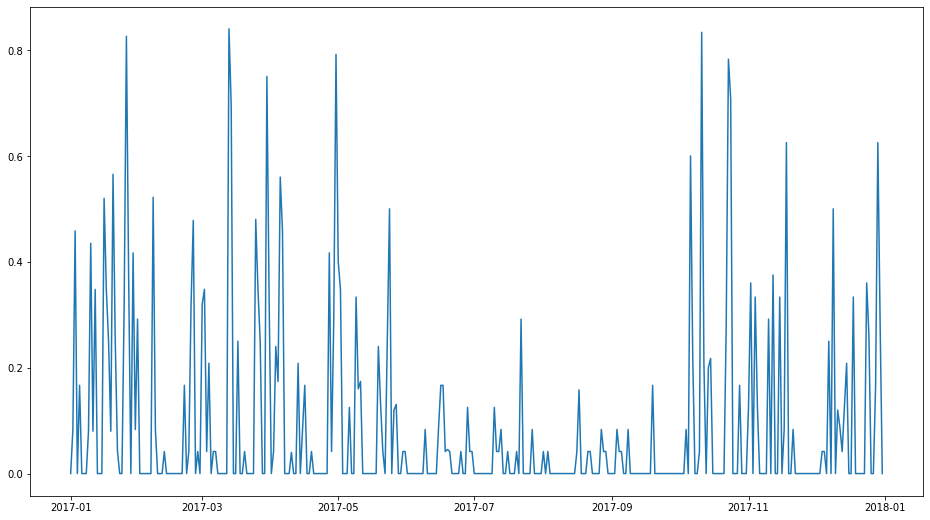

In [172]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_precip_daily)

plt.show()

## Weather Month

In [181]:
chicago_weather_2017_temp_monthly_min = chicago_weather_2017.groupby("Month")["min_temp"].mean()
chicago_weather_2017_temp_monthly_max = chicago_weather_2017.groupby("Month")["max_temp"].mean()
chicago_weather_2017_temp_monthly_mean = chicago_weather_2017.groupby("Month")["mean_temp"].mean()
chicago_weather_2017_precip_monthly = chicago_weather_2017.groupby("Month")["precip"].mean()

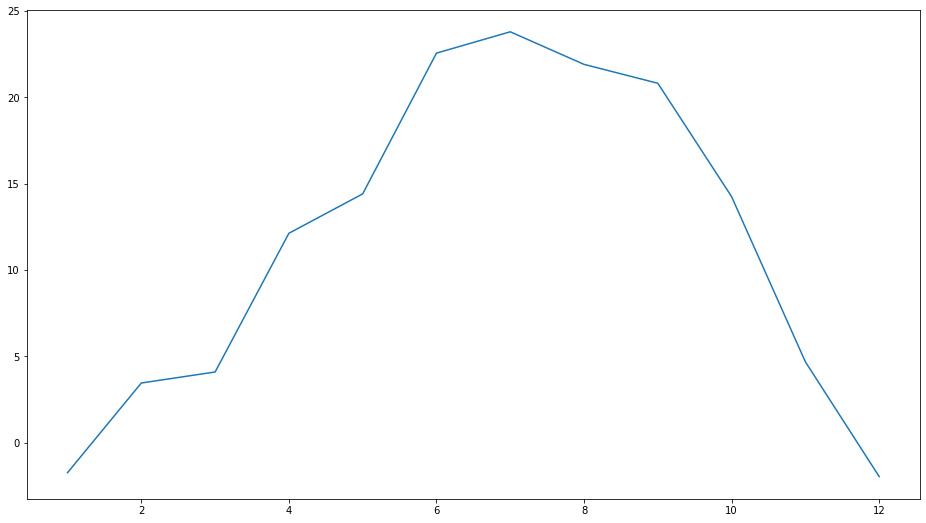

In [182]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_temp_monthly_mean)

plt.show()

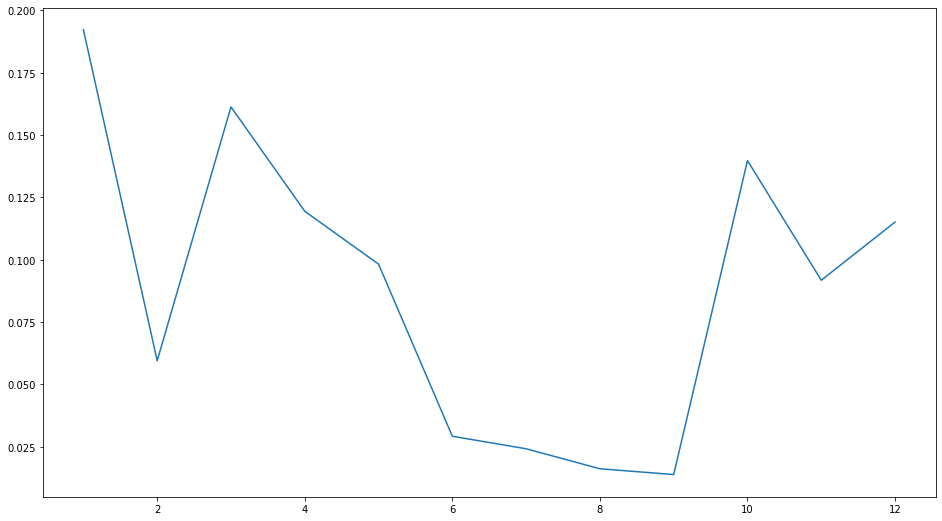

In [183]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_weather_2017_precip_monthly)

plt.show()

# Comination of Bike Usage Data and Weather Data

### Rescale Data - Bike Usage

In [205]:
chicago_data_Date_avail_rescaled = (chicago_data_Date_avail-chicago_data_Date_avail.min())/(chicago_data_Date_avail.max()-chicago_data_Date_avail.min())

### Rescale Data - Weather

In [208]:
chicago_weather_2017_precip_daily_rescaled = (chicago_weather_2017_precip_daily-chicago_weather_2017_precip_daily.min())/(chicago_weather_2017_precip_daily.max()-chicago_weather_2017_precip_daily.min())
chicago_weather_2017_temp_daily_mean_rescaled = (chicago_weather_2017_temp_daily_mean-chicago_weather_2017_temp_daily_mean.min())/(chicago_weather_2017_temp_daily_mean.max()-chicago_weather_2017_temp_daily_mean.min())

## Plot Bike Usage/Weather

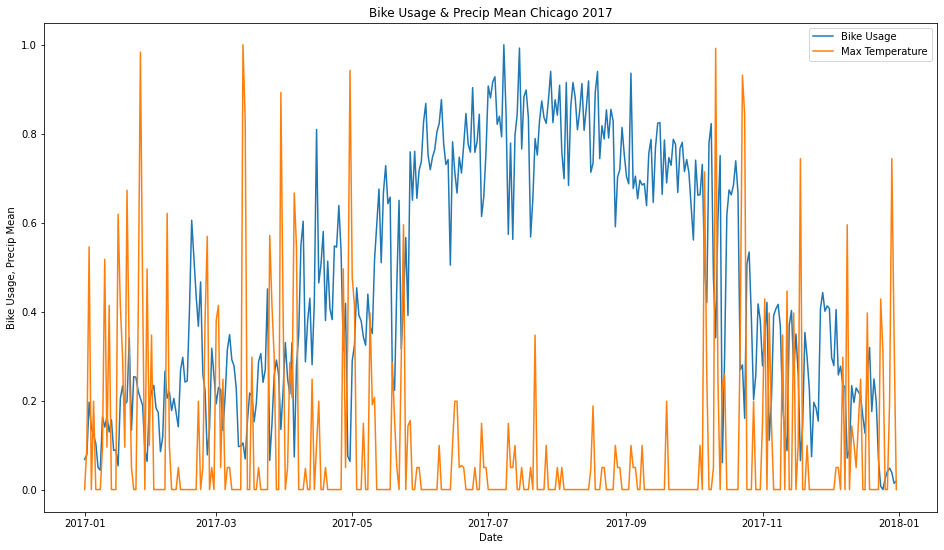

In [209]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_avail_rescaled, label='Bike Usage')
ax.plot(chicago_weather_2017_precip_daily_rescaled, label='Max Temperature')

ax.set_title('Bike Usage & Precip Mean Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Precip Mean')
ax.legend()

plt.show()

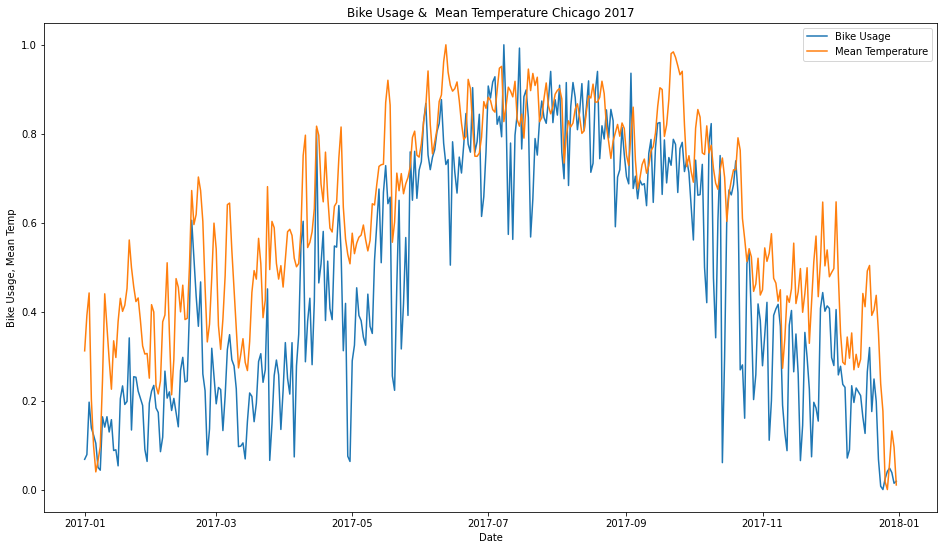

In [211]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(chicago_data_Date_avail_rescaled, label='Bike Usage')
ax.plot(chicago_weather_2017_temp_daily_mean_rescaled, label='Mean Temperature')

ax.set_title('Bike Usage &  Mean Temperature Chicago 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Bike Usage, Mean Temp')
ax.legend()

plt.show()